**Name - NIM**

# **Week 7**


---


## Random Forest and Gradient Boosting Classifier
Today lab exercise will be using Bank Marketing Dataset
- Download the **Bank Marketing Dataset** from Elearn
- Upload the dataset to your own Github
- Import the dataset using URL from your Github

**METADATA** <br>
Age <br>
Job : type of job <br>
Marital : marital status <br>
Education <br>
Default: has credit in default? <br>
Housing: has housing loan? <br>
Loan: has personal loan? <br>
Contact: contact communication type <br>
Month: last contact month of year <br>
Day: last contact day of the week <br>
Duration: last contact duration, in seconds. Important
note: this attribute highly affects the output target (e.g., if
duration=0 then y='no'). <br>
Campaign: number of contacts performed during this campaign and for
this client (includes last contact) <br>
Pdays: number of days that passed by after the client was last
contacted from a previous campaign (999 means client was not
previously contacted) <br>
Previous: number of contacts performed before this campaign and for
this client <br>
Poutcome: outcome of the previous marketing campaign <br>
y: has the client subscribed a term deposit?

## Import Libraries

In [5]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

## Load Dataset

In [6]:
url = "https://raw.githubusercontent.com/OoMyGit/Dataset-DataMining/refs/heads/main/Bank.csv"
df = pd.read_csv(url, sep=';')

df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


## Exploratory Data Analysis
Explore the data to identify patterns within the dataset. <br>
Hint: <br>
* There are no missing values, but some columns contain 'unknown' values. Decide whether it is best to drop it or not.
* The 'admin' and 'management' unique value in the job column represent similar roles, so you can combine them under a single categorical value.




In [13]:
print("\nCount of 'unknown' values in each column:")
unknown_counts = df.apply(lambda x: (x == 'unknown').sum())
print(unknown_counts)


Count of 'unknown' values in each column:
age             0
job            38
marital         0
education     187
default         0
balance         0
housing         0
loan            0
contact      1324
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome     3705
y               0
dtype: int64


In [14]:
# 3. Combine 'admin.' and 'management' in the 'job' column
df['job'] = df['job'].replace(['admin.'], 'management')

# Verify the combination
print("\nJob column value counts after combining 'admin.' and 'management':")
print(df['job'].value_counts())


Job column value counts after combining 'admin.' and 'management':
job
management       1447
blue-collar       946
technician        768
services          417
retired           230
self-employed     183
entrepreneur      168
unemployed        128
housemaid         112
student            84
unknown            38
Name: count, dtype: int64


In [15]:
# 4. Apply One-Hot Encoding to categorical columns
df_encoded = pd.get_dummies(df, drop_first=True)

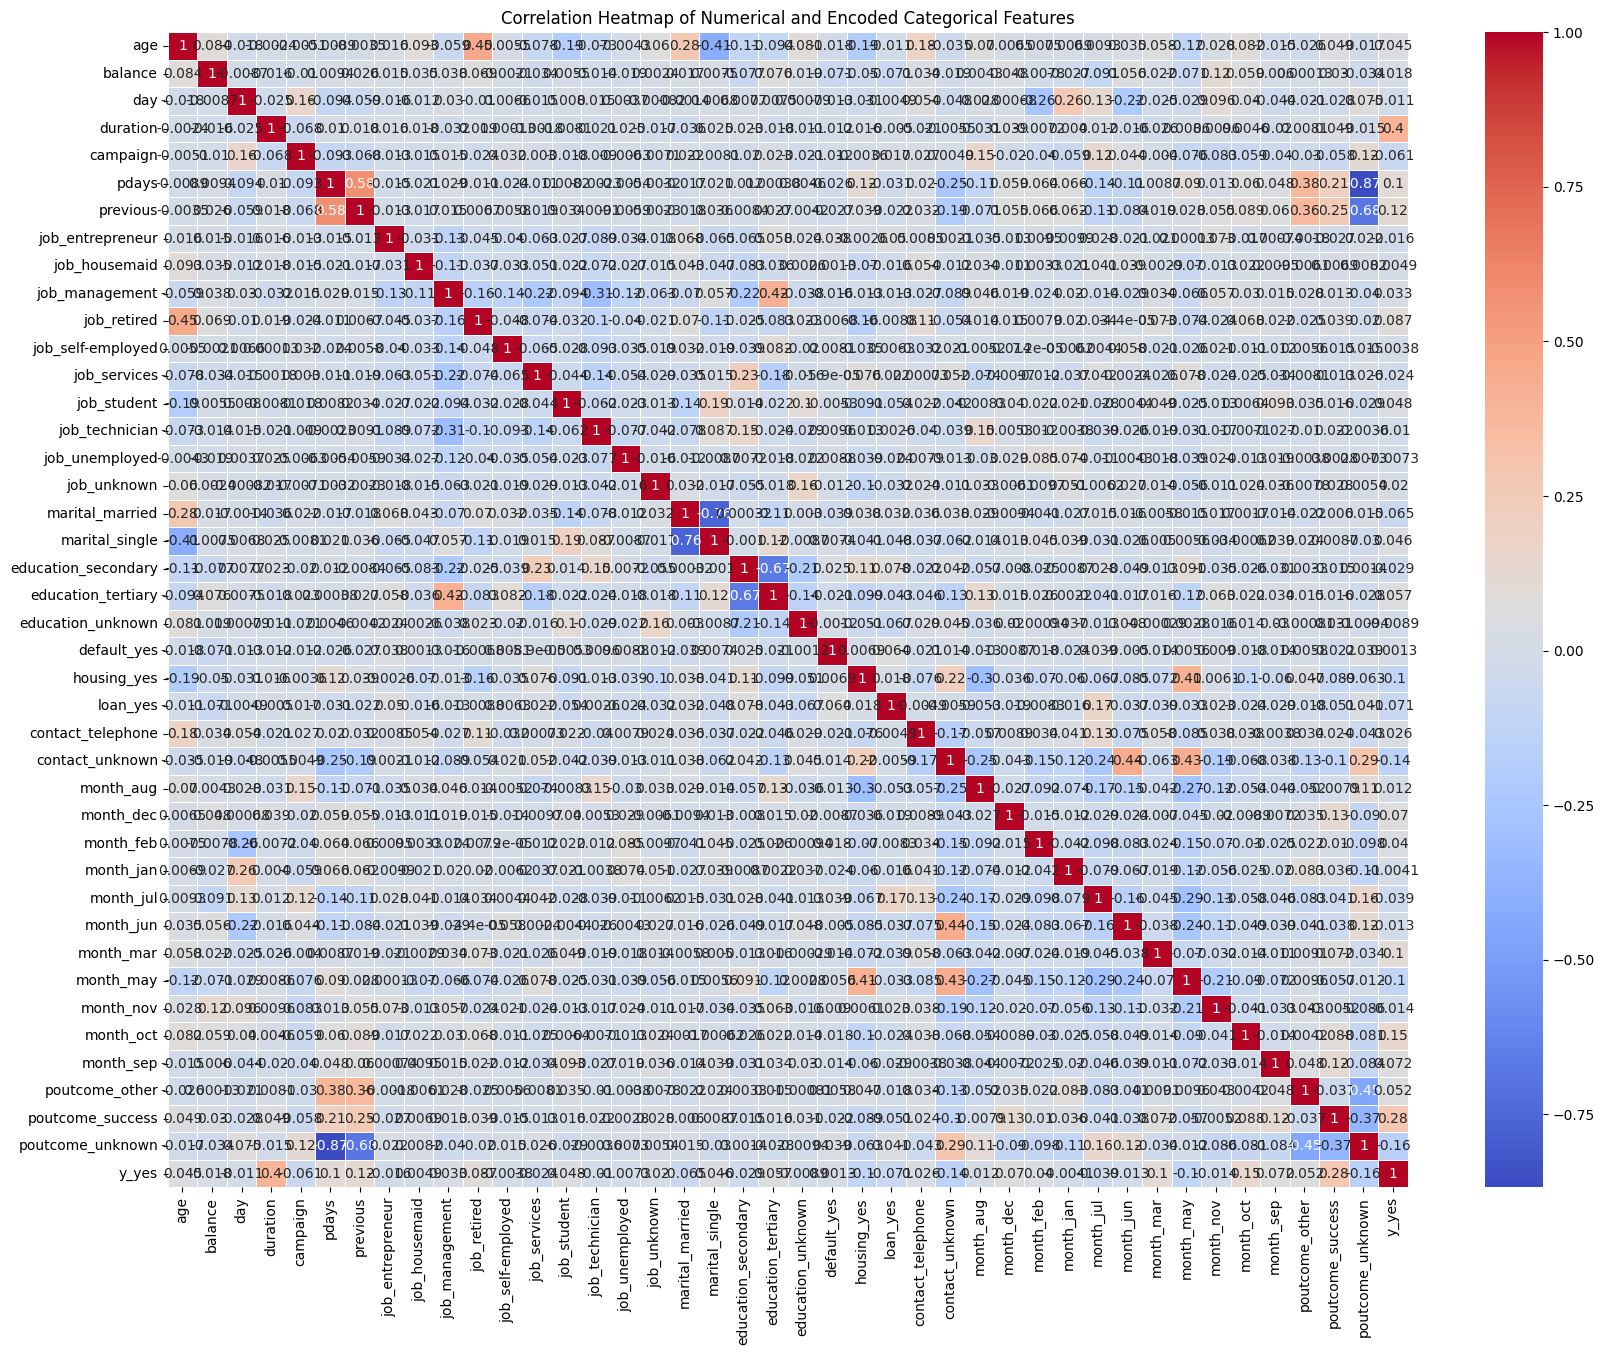

In [16]:
# 5. Correlation Heatmap for Numerical Variables including encoded categories
# Compute the correlation matrix
correlation_matrix = df_encoded.corr()

# Set up the matplotlib figure
plt.figure(figsize=(20, 15))

# Draw the heatmap with the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Show plot
plt.title("Correlation Heatmap of Numerical and Encoded Categorical Features")
plt.show()

## Machine Learning (Split Data)

In [18]:
# Pisahkan fitur dan target
X = df_encoded.drop(columns=['y_yes'])  # Misal, jika target adalah kolom 'y_yes' setelah encoding
y = df_encoded['y_yes']  # Target variabel

# Pisahkan data menjadi training dan test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Tampilkan ukuran data setelah split
print("Training Set:", X_train.shape, y_train.shape)
print("Testing Set:", X_test.shape, y_test.shape)

Training Set: (3164, 41) (3164,)
Testing Set: (1357, 41) (1357,)


## Random Forest


---

a. Defining the model <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Confusion matrix <br>
e. Classification report <br>
f. Results and conclusion <br>

In [21]:
# a. Define the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

In [22]:
# b. Predict the test set results
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

In [23]:
# c. Check accuracy score
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", rf_accuracy)

Random Forest Accuracy: 0.8975681650700074


In [24]:
# d. Confusion matrix
rf_confusion_matrix = confusion_matrix(y_test, y_pred_rf)
print("Random Forest Confusion Matrix:\n", rf_confusion_matrix)

Random Forest Confusion Matrix:
 [[1181   24]
 [ 115   37]]


In [25]:
# e. Classification report
rf_classification_report = classification_report(y_test, y_pred_rf)
print("Random Forest Classification Report:\n", rf_classification_report)

Random Forest Classification Report:
               precision    recall  f1-score   support

       False       0.91      0.98      0.94      1205
        True       0.61      0.24      0.35       152

    accuracy                           0.90      1357
   macro avg       0.76      0.61      0.65      1357
weighted avg       0.88      0.90      0.88      1357



In [26]:
# f. Results and conclusion
print("Random Forest Model Results:")
print("Accuracy:", rf_accuracy)
print("Confusion Matrix:\n", rf_confusion_matrix)
print("Classification Report:\n", rf_classification_report)

print("Random Forest sering kali bekerja dengan baik pada data yang kompleks dan beragam, menangani overfitting dengan baik ")
print("pada dataset yang besar. Model ini mungkin cocok untuk kasus ini jika metrik akurasi dan F1-score menunjukkan hasil")
print("yang memuaskan, terutama jika prediksi yang benar pada kelas-kelas kritis adalah prioritas.")

Random Forest Model Results:
Accuracy: 0.8975681650700074
Confusion Matrix:
 [[1181   24]
 [ 115   37]]
Classification Report:
               precision    recall  f1-score   support

       False       0.91      0.98      0.94      1205
        True       0.61      0.24      0.35       152

    accuracy                           0.90      1357
   macro avg       0.76      0.61      0.65      1357
weighted avg       0.88      0.90      0.88      1357



## Gradient Boosting Classifier


---

a. Defining the model <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Confusion matrix <br>
e. Classification report <br>
f. Results and conclusion <br>

In [27]:
#a. Defining the model
gb_model = GradientBoostingClassifier(random_state=42)

In [29]:
# b. Predict the test set results
gb_model.fit(X_train, y_train)

y_pred_gb = gb_model.predict(X_test)

In [30]:
#c. Check accuracy score
gb_accuracy = accuracy_score(y_test, y_pred_gb)
print("Gradient Boosting Accuracy:", gb_accuracy)

Gradient Boosting Accuracy: 0.8938835666912307


In [31]:
#d. Confusion matrix
gb_confusion_matrix = confusion_matrix(y_test, y_pred_gb)
print("Gradient Boosting Confusion Matrix:\n", gb_confusion_matrix)

Gradient Boosting Confusion Matrix:
 [[1164   41]
 [ 103   49]]


In [32]:
#e. Classification report
gb_classification_report = classification_report(y_test, y_pred_gb)
print("Gradient Boosting Classification Report:\n", gb_classification_report)

Gradient Boosting Classification Report:
               precision    recall  f1-score   support

       False       0.92      0.97      0.94      1205
        True       0.54      0.32      0.40       152

    accuracy                           0.89      1357
   macro avg       0.73      0.64      0.67      1357
weighted avg       0.88      0.89      0.88      1357



In [33]:
#f. Results and conclusion
print("Gradient Boosting Model Results:")
print("Accuracy:", gb_accuracy)
print("Confusion Matrix:\n", gb_confusion_matrix)
print("Classification Report:\n", gb_classification_report)

print("Gradient Boosting sering lebih baik dalam menangkap pola yang kompleks, terutama pada data yang tidak seimbang atau memiliki hubungan non-linear antar fitur.")
print("Jika model ini menunjukkan akurasi, precision, dan recall yang lebih tinggi dibandingkan Random Forest, maka Gradient Boosting adalah pilihan yang tepat untuk")
print("menghasilkan prediksi yang lebih tepat dalam kasus ini.")

Gradient Boosting Model Results:
Accuracy: 0.8938835666912307
Confusion Matrix:
 [[1164   41]
 [ 103   49]]
Classification Report:
               precision    recall  f1-score   support

       False       0.92      0.97      0.94      1205
        True       0.54      0.32      0.40       152

    accuracy                           0.89      1357
   macro avg       0.73      0.64      0.67      1357
weighted avg       0.88      0.89      0.88      1357

